Die ersten 5 Zeilen des Datensatzes:

Grundlegende Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Strecke_Bezeichnung         15744 non-null  object 
 1   bezugsmonat                 15744 non-null  object 
 2   Abschnitt                   15744 non-null  object 
 3   Bezugsmonat_Vorjahresmonat  15744 non-null  object 
 4   DTV_Bezugsmonat             15744 non-null  float64
 5   DTV_Vorjahresmonat          15419 non-null  float64
 6   DTV_P_Bezugsmonat           15744 non-null  float64
 7   DTV_P_Vorjahresmonat        15419 non-null  float64
 8   DTV_G_Bezugsmonat           15744 non-null  float64
 9   DTV_G_Vorjahresmonat        15419 non-null  float64
 10  ISB                         15744 non-null  object 
 11  Abschnitt_von               15744 non-null  object 
 12  Bemerkun

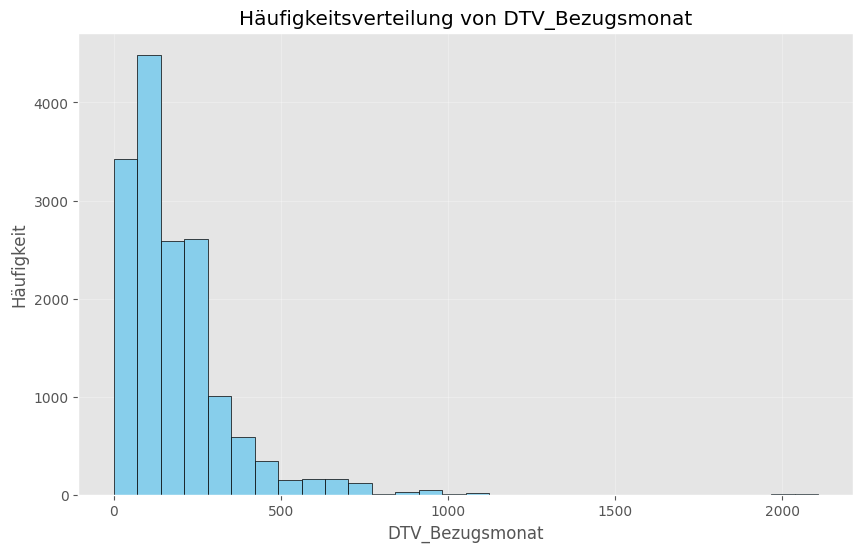

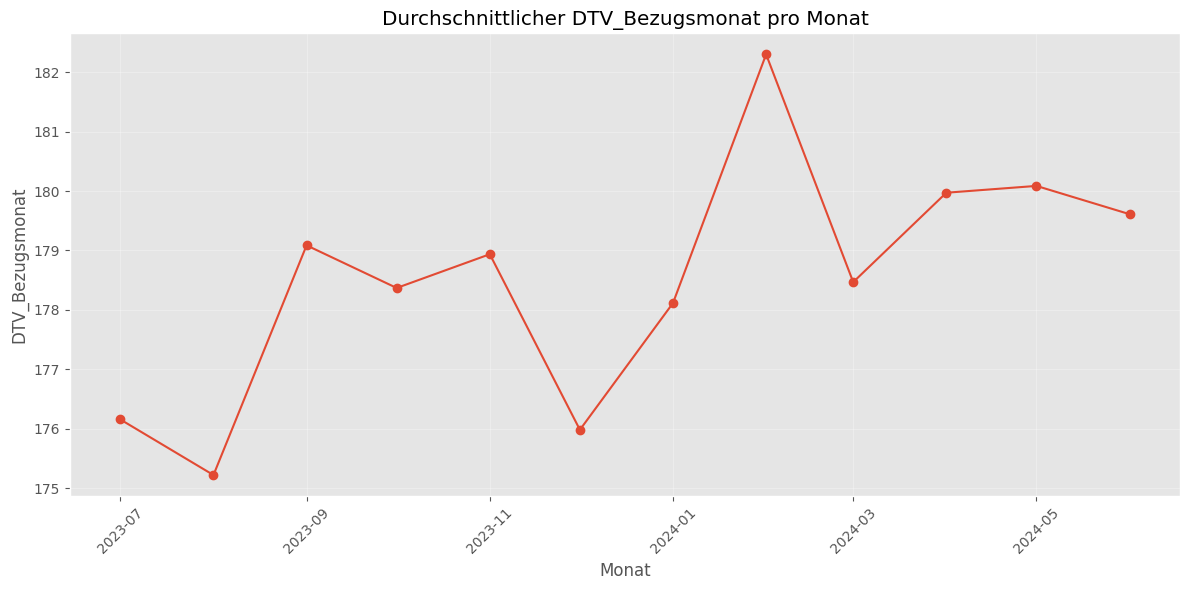

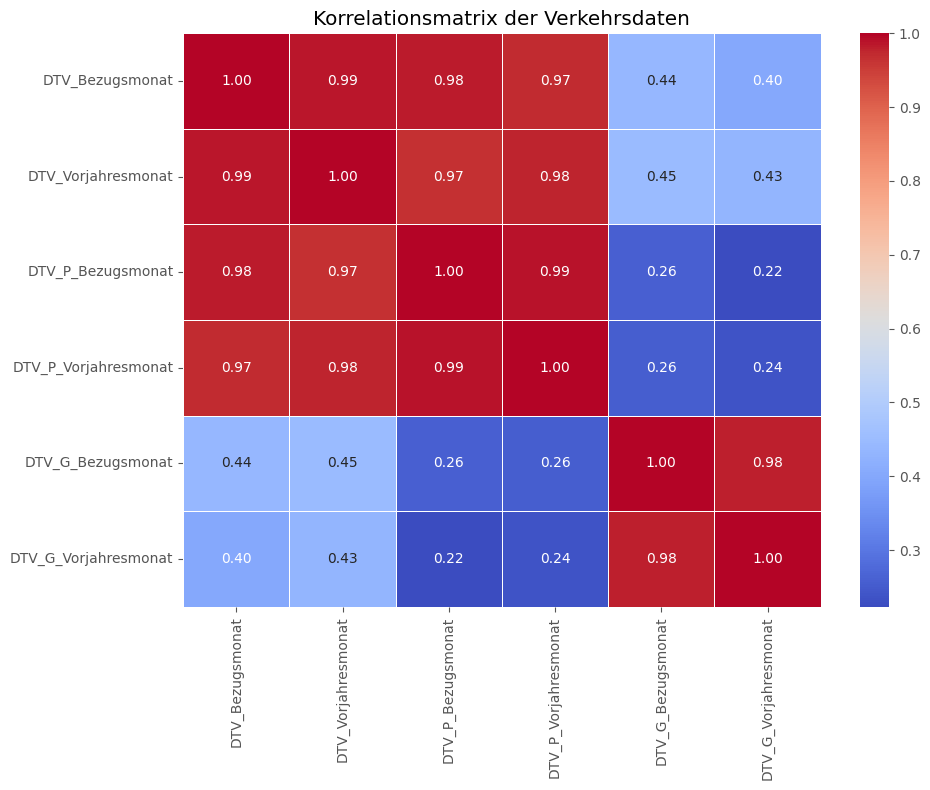


Das Feld 'DTV_Bezugsmonat' wurde skaliert und als 'DTV_Bezugsmonat_skaliert' hinzugefügt.

Vergleich der ersten 5 Zeilen vor und nach der Skalierung:
   DTV_Bezugsmonat  DTV_Bezugsmonat_skaliert
0           379.83                  0.180277
1           351.90                  0.167020
2           322.30                  0.152971
3           442.65                  0.210092
4           302.48                  0.143564


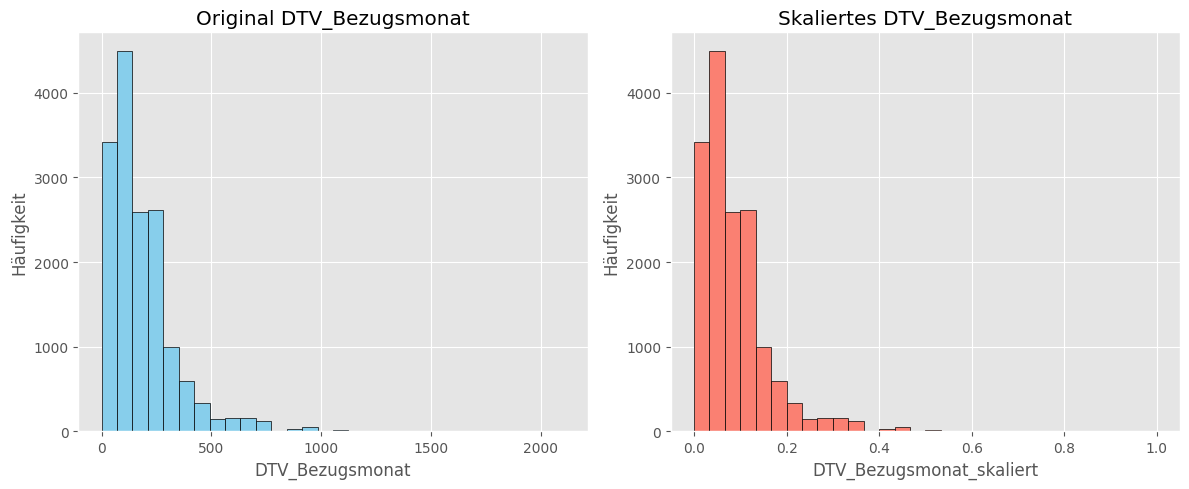


Erklärung, warum die Skalierung sinnvoll ist:

    Die Skalierung des Feldes 'DTV_Bezugsmonat' ist aus folgenden Gründen sinnvoll:
    
    1. Viele Machine Learning Algorithmen (wie lineare Regression, Support Vector Machines 
       und neuronale Netze) funktionieren besser mit skalierten Daten im Bereich [0,1], 
       da sie auf Distanzberechnungen basieren.
    
    2. Da der DTV_Bezugsmonat Werte in verschiedenen Größenordnungen hat (von 0.00 bis 2106.93),
       verhindert die Skalierung, dass Merkmale mit größeren Werten das Modell dominieren.
    
    3. Die Min-Max-Skalierung bewahrt die Verhältnisse zwischen den Datenpunkten, 
       transformiert aber alle Werte in den Bereich [0,1], was die Vergleichbarkeit verbessert.
    
    4. Bei der Verwendung von Gradientenabstiegsverfahren kann die Konvergenz beschleunigt werden, 
       wenn die Daten einheitlich skaliert sind.
    


In [5]:
# Datenanalyse und Vorbereitung für maschinelles Lernen

# 1. Importieren der benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Für schönere Diagramme
plt.style.use('ggplot')

# 2. Laden des Datensatzes
# CSV-Datei mit Semikolon als Trennzeichen laden
df = pd.read_csv('zugzahlen_pro_monat.csv', sep=';')

# Anzeigen der ersten Zeilen
print("Die ersten 5 Zeilen des Datensatzes:")
df.head()

# 3. Überblick über den Datensatz
print("\nGrundlegende Informationen zum Datensatz:")
df.info()

# Beschreibende Statistiken
print("\nStatistische Übersicht:")
df.describe()

# Überprüfen auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# 4. Auswahl des Vorhersagefeldes (Anforderung 2.1)
# Ich wähle den DTV_Bezugsmonat als Vorhersagefeld (Tagesverkehrsdurchschnitt)
vorhersage_feld = 'DTV_Bezugsmonat'

print(f"Ich möchte Vorhersagen für das Feld '{vorhersage_feld}' treffen.")

# Informationen über das Vorhersagefeld
if vorhersage_feld in df.columns:
    print(f"\nInformationen über das Feld '{vorhersage_feld}':")
    print(f"Anzahl der Werte: {df[vorhersage_feld].count()}")
    print(f"Datentyp: {df[vorhersage_feld].dtype}")
    print(f"Minimum: {df[vorhersage_feld].min()}")
    print(f"Maximum: {df[vorhersage_feld].max()}")
    print(f"Mittelwert: {df[vorhersage_feld].mean():.2f}")
    print(f"Median: {df[vorhersage_feld].median()}")
    print(f"Standardabweichung: {df[vorhersage_feld].std():.2f}")
    
    # Quartile
    q25 = df[vorhersage_feld].quantile(0.25)
    q75 = df[vorhersage_feld].quantile(0.75)
    print(f"25% Quartil: {q25}")
    print(f"75% Quartil: {q75}")
    print(f"Interquartilbereich (IQR): {q75 - q25}")
else:
    print(f"Das Feld '{vorhersage_feld}' existiert nicht im Datensatz.")
    print(f"Vorhandene Spalten: {df.columns.tolist()}")

# 5. Statistische Informationen zu jedem Feld (Anforderung 2.2)
# Identifiziere die numerischen Spalten im Datensatz
numerische_spalten = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerische Spalten im Datensatz: {numerische_spalten}")

# Statistische Kennzahlen für jedes numerische Feld
for spalte in numerische_spalten:
    print(f"\n--- Statistik für '{spalte}' ---")
    stats = {
        'Anzahl Werte': df[spalte].count(),
        'Mittelwert': df[spalte].mean(),
        'Median': df[spalte].median(),
        'Standardabweichung': df[spalte].std(),
        'Minimum': df[spalte].min(),
        'Maximum': df[spalte].max(),
        '25% Perzentil': df[spalte].quantile(0.25),
        '75% Perzentil': df[spalte].quantile(0.75)
    }
    
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")

# 6. Erstellung von Grafiken (Anforderung 2.3)
# 6.1 Histogramm für das Vorhersagefeld
if vorhersage_feld in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[vorhersage_feld].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Häufigkeitsverteilung von {vorhersage_feld}')
    plt.xlabel(vorhersage_feld)
    plt.ylabel('Häufigkeit')
    plt.grid(True, alpha=0.3)
    plt.show()

# 6.2 Zeitreihenanalyse (falls bezugsmonat als Datums-Feld vorhanden ist)
# Prüfen, ob 'bezugsmonat' vorhanden ist
if 'bezugsmonat' in df.columns:
    # Konvertiere zu Datetime 
    df['bezugsmonat'] = pd.to_datetime(df['bezugsmonat'], errors='coerce')
    
    # Gruppieren nach Monat und Mittelwert berechnen
    monatlich = df.groupby('bezugsmonat')[vorhersage_feld].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(monatlich['bezugsmonat'], monatlich[vorhersage_feld], marker='o', linestyle='-')
    plt.title(f'Durchschnittlicher {vorhersage_feld} pro Monat')
    plt.xlabel('Monat')
    plt.ylabel(vorhersage_feld)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6.3 Korrelation zwischen verschiedenen Verkehrsdaten
# Finde relevante numerische Spalten für die Korrelation
verkehrs_spalten = [col for col in numerische_spalten if 'DTV' in col]

if len(verkehrs_spalten) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[verkehrs_spalten].corr()
    
    # Heatmap mit Korrelationswerten
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Korrelationsmatrix der Verkehrsdaten')
    plt.tight_layout()
    plt.show()

# 7. Skalierung eines Datenfeldes (Anforderung 2.4)
if vorhersage_feld in df.columns:
    # Erstelle einen MinMaxScaler
    scaler = MinMaxScaler()
    
    # Bereite die Daten für den Scaler vor (fülle NaN-Werte)
    df_clean = df.dropna(subset=[vorhersage_feld])
    values = df_clean[vorhersage_feld].values.reshape(-1, 1)
    
    # Führe die Skalierung durch
    scaled_values = scaler.fit_transform(values)
    
    # Füge die skalierten Werte zum DataFrame hinzu
    df_clean[f'{vorhersage_feld}_skaliert'] = scaled_values
    
    print(f"\nDas Feld '{vorhersage_feld}' wurde skaliert und als '{vorhersage_feld}_skaliert' hinzugefügt.")
    print("\nVergleich der ersten 5 Zeilen vor und nach der Skalierung:")
    print(df_clean[[vorhersage_feld, f'{vorhersage_feld}_skaliert']].head())
    
    # Histogramm der skalierten Werte zum Vergleich
    plt.figure(figsize=(12, 5))
    
    # Original-Werte
    plt.subplot(1, 2, 1)
    plt.hist(df_clean[vorhersage_feld], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Original {vorhersage_feld}')
    plt.xlabel(vorhersage_feld)
    plt.ylabel('Häufigkeit')
    
    # Skalierte Werte
    plt.subplot(1, 2, 2)
    plt.hist(df_clean[f'{vorhersage_feld}_skaliert'], bins=30, color='salmon', edgecolor='black')
    plt.title(f'Skaliertes {vorhersage_feld}')
    plt.xlabel(f'{vorhersage_feld}_skaliert')
    plt.ylabel('Häufigkeit')
    
    plt.tight_layout()
    plt.show()
    
    # Erklärung warum die Skalierung sinnvoll ist
    print("\nErklärung, warum die Skalierung sinnvoll ist:")
    print("""
    Die Skalierung des Feldes '{0}' ist aus folgenden Gründen sinnvoll:
    
    1. Viele Machine Learning Algorithmen (wie lineare Regression, Support Vector Machines 
       und neuronale Netze) funktionieren besser mit skalierten Daten im Bereich [0,1], 
       da sie auf Distanzberechnungen basieren.
    
    2. Da der {0} Werte in verschiedenen Grössenordnungen hat (von {1:.2f} bis {2:.2f}),
       verhindert die Skalierung, dass Merkmale mit grösseren Werten das Modell dominieren.
    
    3. Die Min-Max-Skalierung bewahrt die Verhältnisse zwischen den Datenpunkten, 
       transformiert aber alle Werte in den Bereich [0,1], was die Vergleichbarkeit verbessert.
    
    4. Bei der Verwendung von Gradientenabstiegsverfahren kann die Konvergenz beschleunigt werden, 
       wenn die Daten einheitlich skaliert sind.
    """.format(vorhersage_feld, df[vorhersage_feld].min(), df[vorhersage_feld].max()))